In [12]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import regionmask
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.colors import SymLogNorm
import xesmf as xe
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display
from matplotlib.lines import Line2D

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PolyCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs
import cmocean

import scipy.signal as signal

import os
import sys
sys.path.insert(0, '/net/fs11/d0/emfreese/BC-IRF/')
import utils


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Options

In [2]:
regions = ['SEA', 'Indo','Malay','all_countries','Viet','Cambod']
months = ['Jan','Apr','July', 'Oct'] #options are Jan, Apr, July, Oct
time = '2016'
pulse_size = '2x'
length_simulation = 60 #days
diagnostic = 'SpeciesConc'


In [3]:
region_colors = {'all_countries':'navy', 'Indo':'darkslategrey', 'Viet':'darksalmon', 'Malay':'plum', 'Cambod':'olivedrab'}

In [4]:
Indo_colors = {'Indo_Jan_Center':'teal', 'Indo_Jan_NW':'steelblue', 'Indo_Jan_SE':'lightskyblue', 'Indo_Jan':region_colors['Indo']}

In [5]:
Indo_time_colors = {'Indo_Jan_6':'teal', 'Indo_Jan_11':'lightseagreen', 'Indo_Jan_16':'mediumaquamarine', 'Indo_Jan_21':'paleturquoise', 'Indo_Jan':region_colors['Indo']}

## Import the Green's function

In [6]:
G = xr.open_dataset(f'{utils.data_output_path}greens_functions/G_combined.nc', chunks = 'auto')

In [7]:
area_ds = xr.open_dataset(f'{utils.geos_chem_data_path}stretch_2x_pulse/SEA/Jan/mod_output/GEOSChem.Emissions.20160101_0000z.nc4')

In [8]:
area_ds = utils.fix_area_ij_latlon(area_ds)


## Video of the Green's Function

In [14]:
G_mean = G.weighted(area_ds['area']).mean(dim = ['lat','lon'])['BC_total'].isel(lev = 0).compute()

In [13]:
G_lev0 = G.sel(run = 'all_countries_Apr').where((G.sel(run = 'all_countries_Apr') > 0), drop = True)

for t in np.arange(0,21):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
    ##### global view #######
    (G_lev0.isel(time = t, lev = 0)['BC_total']).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(5e-20, 1, 1e-13, 1e-8), add_colorbar = False,
                                                                               cmap = 'gist_heat_r')
    ax1.coastlines()
    ax1.set_title('')
    ##### Zoomed in ########
    (G_lev0.isel(time = t, lev = 0).fillna(0)['BC_total']).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                                norm = SymLogNorm(5e-20, 1, 1e-13, 1e-8),
                                                                               cmap = 'gist_heat_r',
                                                                               cbar_kwargs = {'label':None})
    ax2.coastlines()
    ax2.add_feature(cfeat.STATES)
    ax2.set_extent([80,150,-20,40])
    ax2.set_title('')
    plt.suptitle(f'Day {t}', fontsize = 16);
    plt.tight_layout()

    PATH = f'{utils.figures_data_path}video/greens_function/'
    if not os.path.exists(PATH):
        os.makedirs(PATH)

    plt.savefig(PATH + str(t).zfill(4) + ".png", dpi = 150, bbox_inches = 'tight')
    plt.close();

## Emissions Example

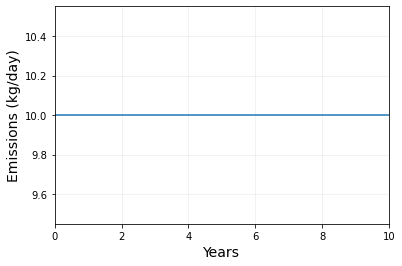

In [10]:
emis = 10 #kg/day
plt.plot(np.ones(11)*emis)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Emissions (kg/day)', fontsize = 14)
plt.grid(alpha = .2)
plt.xlim(0,10)
plt.savefig('figures/emis_ex.png', bbox_inches = 'tight', dpi = 350)

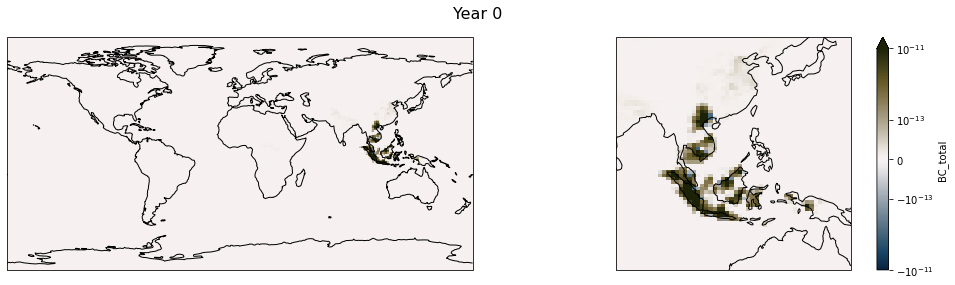

In [12]:
t = 0
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [14,4], subplot_kw={'projection':ccrs.PlateCarree()})
##### global view #######
(G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']*365*emis).plot(ax = ax1, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11), add_colorbar = False,
                                                                           cmap = cmocean.cm.diff)
ax1.coastlines()
ax1.set_title('')
##### Zoomed in ########
(G.sel(run = 'all_countries_Jan').isel(time = t, lev = 0)['BC_total']*365*emis).plot(ax = ax2, transform = ccrs.PlateCarree(), 
                                                                            norm = SymLogNorm(1e-13, 1, -1e-11, 1e-11),
                                                                           cmap = cmocean.cm.diff)
ax2.coastlines()
ax2.add_feature(cfeat.STATES)
ax2.set_extent([80,150,-20,40])
ax2.set_title('')
plt.suptitle(f'Year {t}', fontsize = 16);
plt.tight_layout()
#plt.savefig(f"figures/conv_explainer_time{t}.png", dpi = 350, bbox_inches = 'tight')